>
> # MaaS Sim tutorial
>
> ## External functionalities
>
-----
example of simulations with various functionalities included

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import random

In [3]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.traveller import travellerEvent
from MaaSSim.driver import driverEvent
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.decisions import dummy_False
import pandas as pd
import logging

In [4]:
params = get_config('../../data/config/default.json')  # load configuration

In [5]:
params.times.patience = 200  # 1 hour of simulation
params.simTime = 1  # 1 hour of simulation
params.nP = 10  # reuqests (and passengers)
params.nV = 10  # vehicles
params.nD = 1

user defined functions to reject with probability of 20 and 80% respectively, passed to MaaSSim by reference and called from simulator

In [6]:
def rand_reject8(**kwargs):
    return random.random()>=0.8

def rand_reject2(**kwargs):
    return random.random()>=0.2

In [7]:
params = get_config('../../data/config/delft.json')  # load configuration
params.times.patience = 300  # 1 hour of simulation
params.simTime = 1  # 1 hour of simulation
params.nP = 10  # reuqests (and passengers)
params.nV = 10  # vehicles
params.nD = 1

In [8]:
# no functions
sim2 = simulate(params=params, f_trav_mode=dummy_False,f_driver_decline=dummy_False,f_platform_choice=dummy_False, logger_level = logging.CRITICAL)
# driver request decline behaviour
sim2.make_and_run(f_trav_mode=dummy_False,
                      f_driver_decline=rand_reject8)
# traveller rejects offers
sim2.make_and_run(f_trav_mode=rand_reject8,
                      f_driver_decline=dummy_False)
# both reject
sim2.make_and_run(f_trav_mode=rand_reject8,
                      f_driver_decline=rand_reject8)

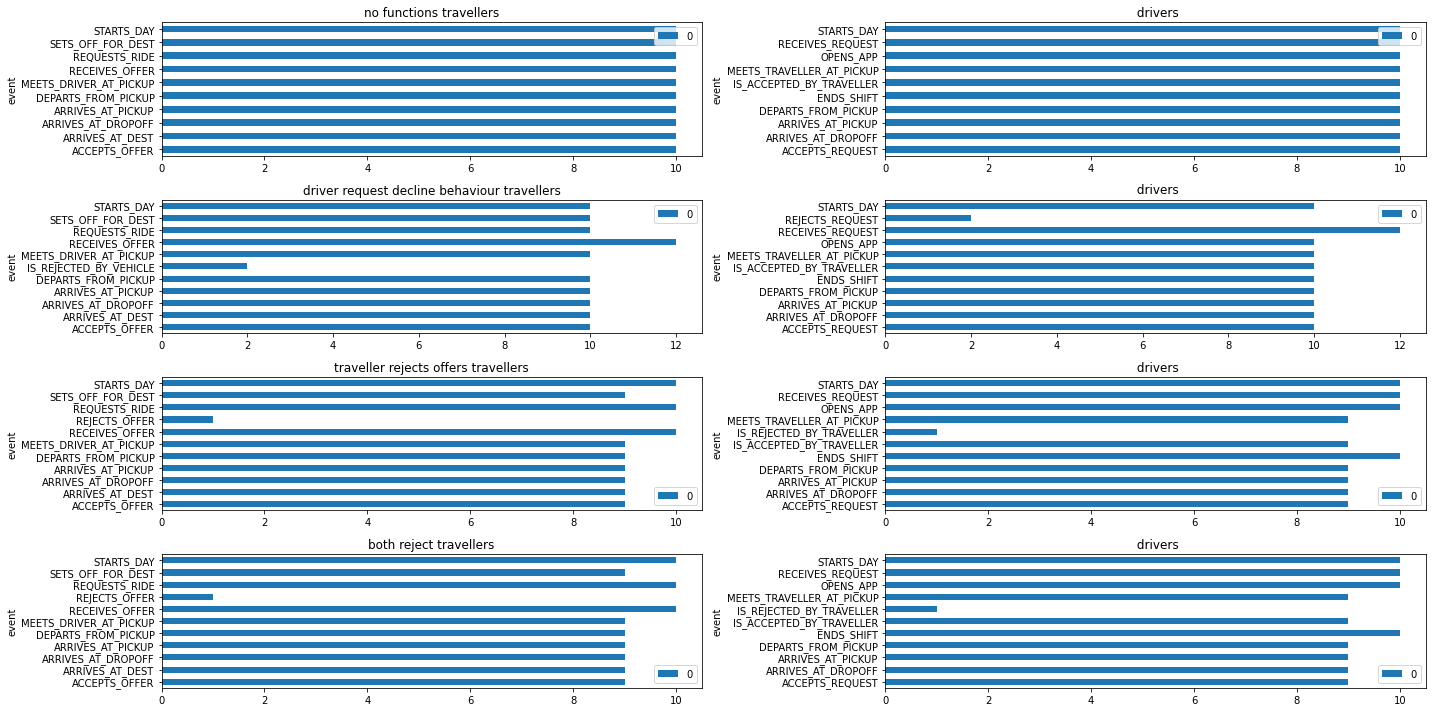

In [9]:
import matplotlib.pyplot as plt
titles = 'no functions','driver request decline behaviour','traveller rejects offers', 'both reject'
fig, ax = plt.subplots(4,2, figsize = (20,10))
for i in range(4):
    df = sim2.runs[i].trips.groupby('event').size().to_frame()
    df.plot(kind='barh', ax = ax[i][0], title = titles[i]+ " travellers")
    df = sim2.runs[i].rides.groupby('event').size().to_frame()
    df.plot(kind='barh', ax = ax[i][1], title =  " drivers")
fig.tight_layout()

> driver repositioning

In [10]:
from MaaSSim.driver import VehicleAgent, driverEvent
from MaaSSim.decisions import f_repos, f_dummy_repos
sim = simulate(inData, params = params, _print = False, f_driver_repos = f_repos, f_trav_mode=dummy_False, f_driver_decline=dummy_False,f_platform_choice=dummy_False, logger_level = logging.WARNING) 
pd.DataFrame(sim.runs[0].rides.event.unique())

13-10-20 16:00:01-WARNING-Setting up 1h simulation at 2020-10-13 15:32:13 for 10 vehicles and 10 passengers in Delft, Netherlands
13-10-20 16:00:01-WARNING-simulation time 0.3 s
   pax         pos     t              event  veh_id
0    9  6280811243     0         STARTS_DAY     NaN
1    9  6280811243  3402      REQUESTS_RIDE     NaN
2    9  6280811243  3402     RECEIVES_OFFER     NaN
3    9  6280811243  3417      ACCEPTS_OFFER     NaN
4    9  6280811243  3437  ARRIVES_AT_PICKUP    10.0


AssertionError: 

-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl